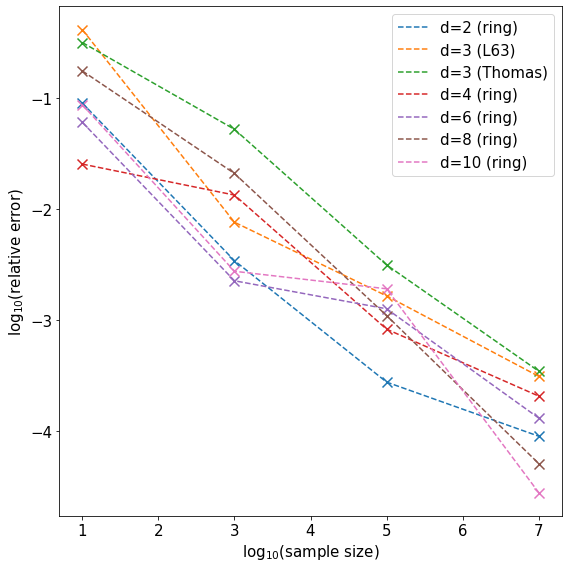

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

def get_sol(file):
    df = pd.read_csv(file)
    return df['N'].to_numpy(), df['sol'].to_numpy()

# set up plotting parameters
scale = 0
xlabel_size = ylabel_size = 15 + scale
tick_size = 15 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale

files = ['../ring-fp/data/sol{}D.csv'.format(2)]
files.append('../non-grad3D/data/L63/sol.csv')
files.append('../non-grad3D/data/Thomas/sol.csv')
files += ['../ring-fp/data/sol{}D.csv'.format(d) for d in [4, 6, 8, 10]]


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

labels = ['d=2 (ring)'] + ['d=3 (L63)', 'd=3 (Thomas)'] + ['d={} (ring)'.format(i) for i in [4, 6, 8, 10]]
linestyles = ['solid'] + ['dashed']*2 + ['solid' for i in [4, 6, 8, 10]] 


for i, file in enumerate(files):
#     if i in [0, 3, 4, 5]:
#         continue
    N, s = get_sol(file)
    e = np.abs(s - s[-1])/s[-1]
    m = 0
    ax.plot(np.log10(N[m:-1])+1, np.log10(e[m:-1]), label=labels[i], linestyle='--')
    ax.scatter(np.log10(N[m:-1])+1, np.log10(e[m:-1]), marker='x', s=100)

ax.set_xlabel(r'$\log_{10}$(sample size)', fontsize=xlabel_size)
ax.set_ylabel(r'$\log_{10}$(relative error)', fontsize=ylabel_size)
ax.tick_params(axis='both', which='major', labelsize=tick_size)
ax.tick_params(axis='both', which='minor', labelsize=tick_size)
ax.legend(fontsize=legend_size)

plt.tight_layout()
plt.savefig('../plots/sample-complexity-FK.png')